# Advance Regression : Surprice Housing

------------------------------------------------------------------------------------------------------------------------------

### The solution is defined using following steps:

1. Data Understanding
2. Data Cleaning
3. Data Preparation
4. Model Building
5. Observations and inferences

### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding Data

In [158]:
#Reading data from csv file
house = pd.read_csv("train.csv", na_values="NAN")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [159]:
house.shape

(1460, 81)

In [160]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data Cleaning

In [161]:
# Deleting column Id as it is irrelavent
house.drop(['Id'], axis = 1,inplace = True)

In [162]:
# Changing data type for MSSubClass to object as it is categorical variable
house[['MSSubClass']] = house[['MSSubClass']].astype('object')

### Handling Null Values

In [163]:
# checking null values
null_col =house.isnull().sum()
# checking columns which have null values
null_col = null_col[null_col > 0]
# % of columns missing null values
print(round(100*null_col[null_col > 0]/len(house),2))

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


Based on Data Dictionary some of the null values have actual meaning.
<br> Eg. BsmtQual NA value indicates no basement, hence this will affect the pricing of the house.
<br><br>
For Below mentioned columns we will fill the value with 'None'.
<br>
Alley, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature


In [164]:
columns_null_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2","MasVnrType" ,"FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]


In [165]:
for i in columns_null_meaning:
    house[i].fillna("None", inplace=True)

In [166]:
# checking null values
null_col =house.isnull().sum()
# find out columns which have nulls
null_col = null_col[null_col > 0]
# % of columns missing
print(round(100*null_col[null_col > 0]/len(house),2))

LotFrontage    17.74
MasVnrArea      0.55
Electrical      0.07
GarageYrBlt     5.55
dtype: float64


In [167]:
# Dropping LotFrontage as it has higgest value of null
house.drop(['LotFrontage'], axis = 1,inplace = True)

In [168]:
# checking null values
null_col =house.isnull().sum()
# find out columns which have nulls
null_col = null_col[null_col > 0]
# % of columns missing
print(round(100*null_col[null_col > 0]/len(house),2))

MasVnrArea     0.55
Electrical     0.07
GarageYrBlt    5.55
dtype: float64


Understanding and checking values in above column for imputing.

In [169]:
house["MasVnrArea"].value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [170]:
house["GarageYrBlt"].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:xlabel='Electrical', ylabel='count'>

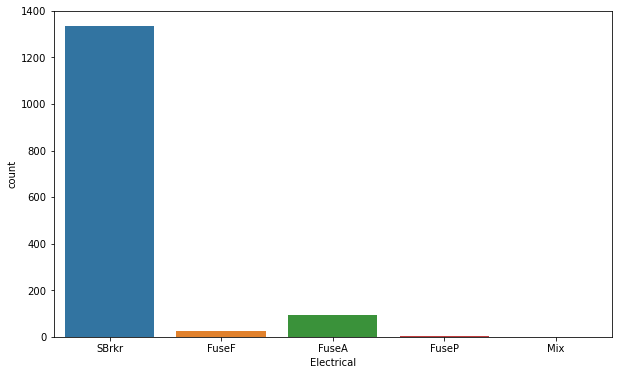

In [171]:
plt.figure(figsize=(10,6))
sns.countplot(house["Electrical"])

GarageYrBlt , MasVnrArea are numeric values so we will fill null values with its median.
<br>As there is only 1 value with electrical as null so we replace NULL values with "SBrkr" as SBrkr has the maximum appearance


In [172]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)

In [173]:
house["Electrical"] = house["Electrical"].fillna("SBrkr")

In [174]:
# checking null values
null_col =house.isnull().sum()
# find out columns which have nulls
null_col = null_col[null_col > 0]
# % of columns missing
print(round(100*null_col[null_col > 0]/len(house),2))

Series([], dtype: float64)


In [175]:
# Changing data type for GarageYrBlt_Age to int as it is ordinal variable
house['GarageYrBlt'] = house['GarageYrBlt'].astype(int)

### Data Preparation and EDA

##### All the Null values are handled.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

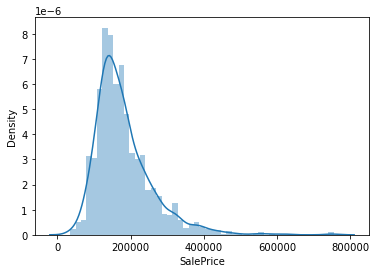

In [176]:
sns.distplot(house["SalePrice"])

As we see the target variable is left skewed we will use logarithmic function to transfor it into a noral distribution

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

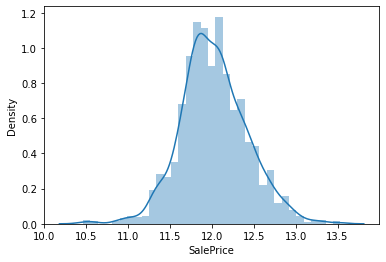

In [177]:
house["SalePrice"] = np.log(house["SalePrice"])
sns.distplot(house["SalePrice"])

In [178]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,20,RL,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,60,RL,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,70,RL,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,60,RL,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,12.429216


<AxesSubplot:>

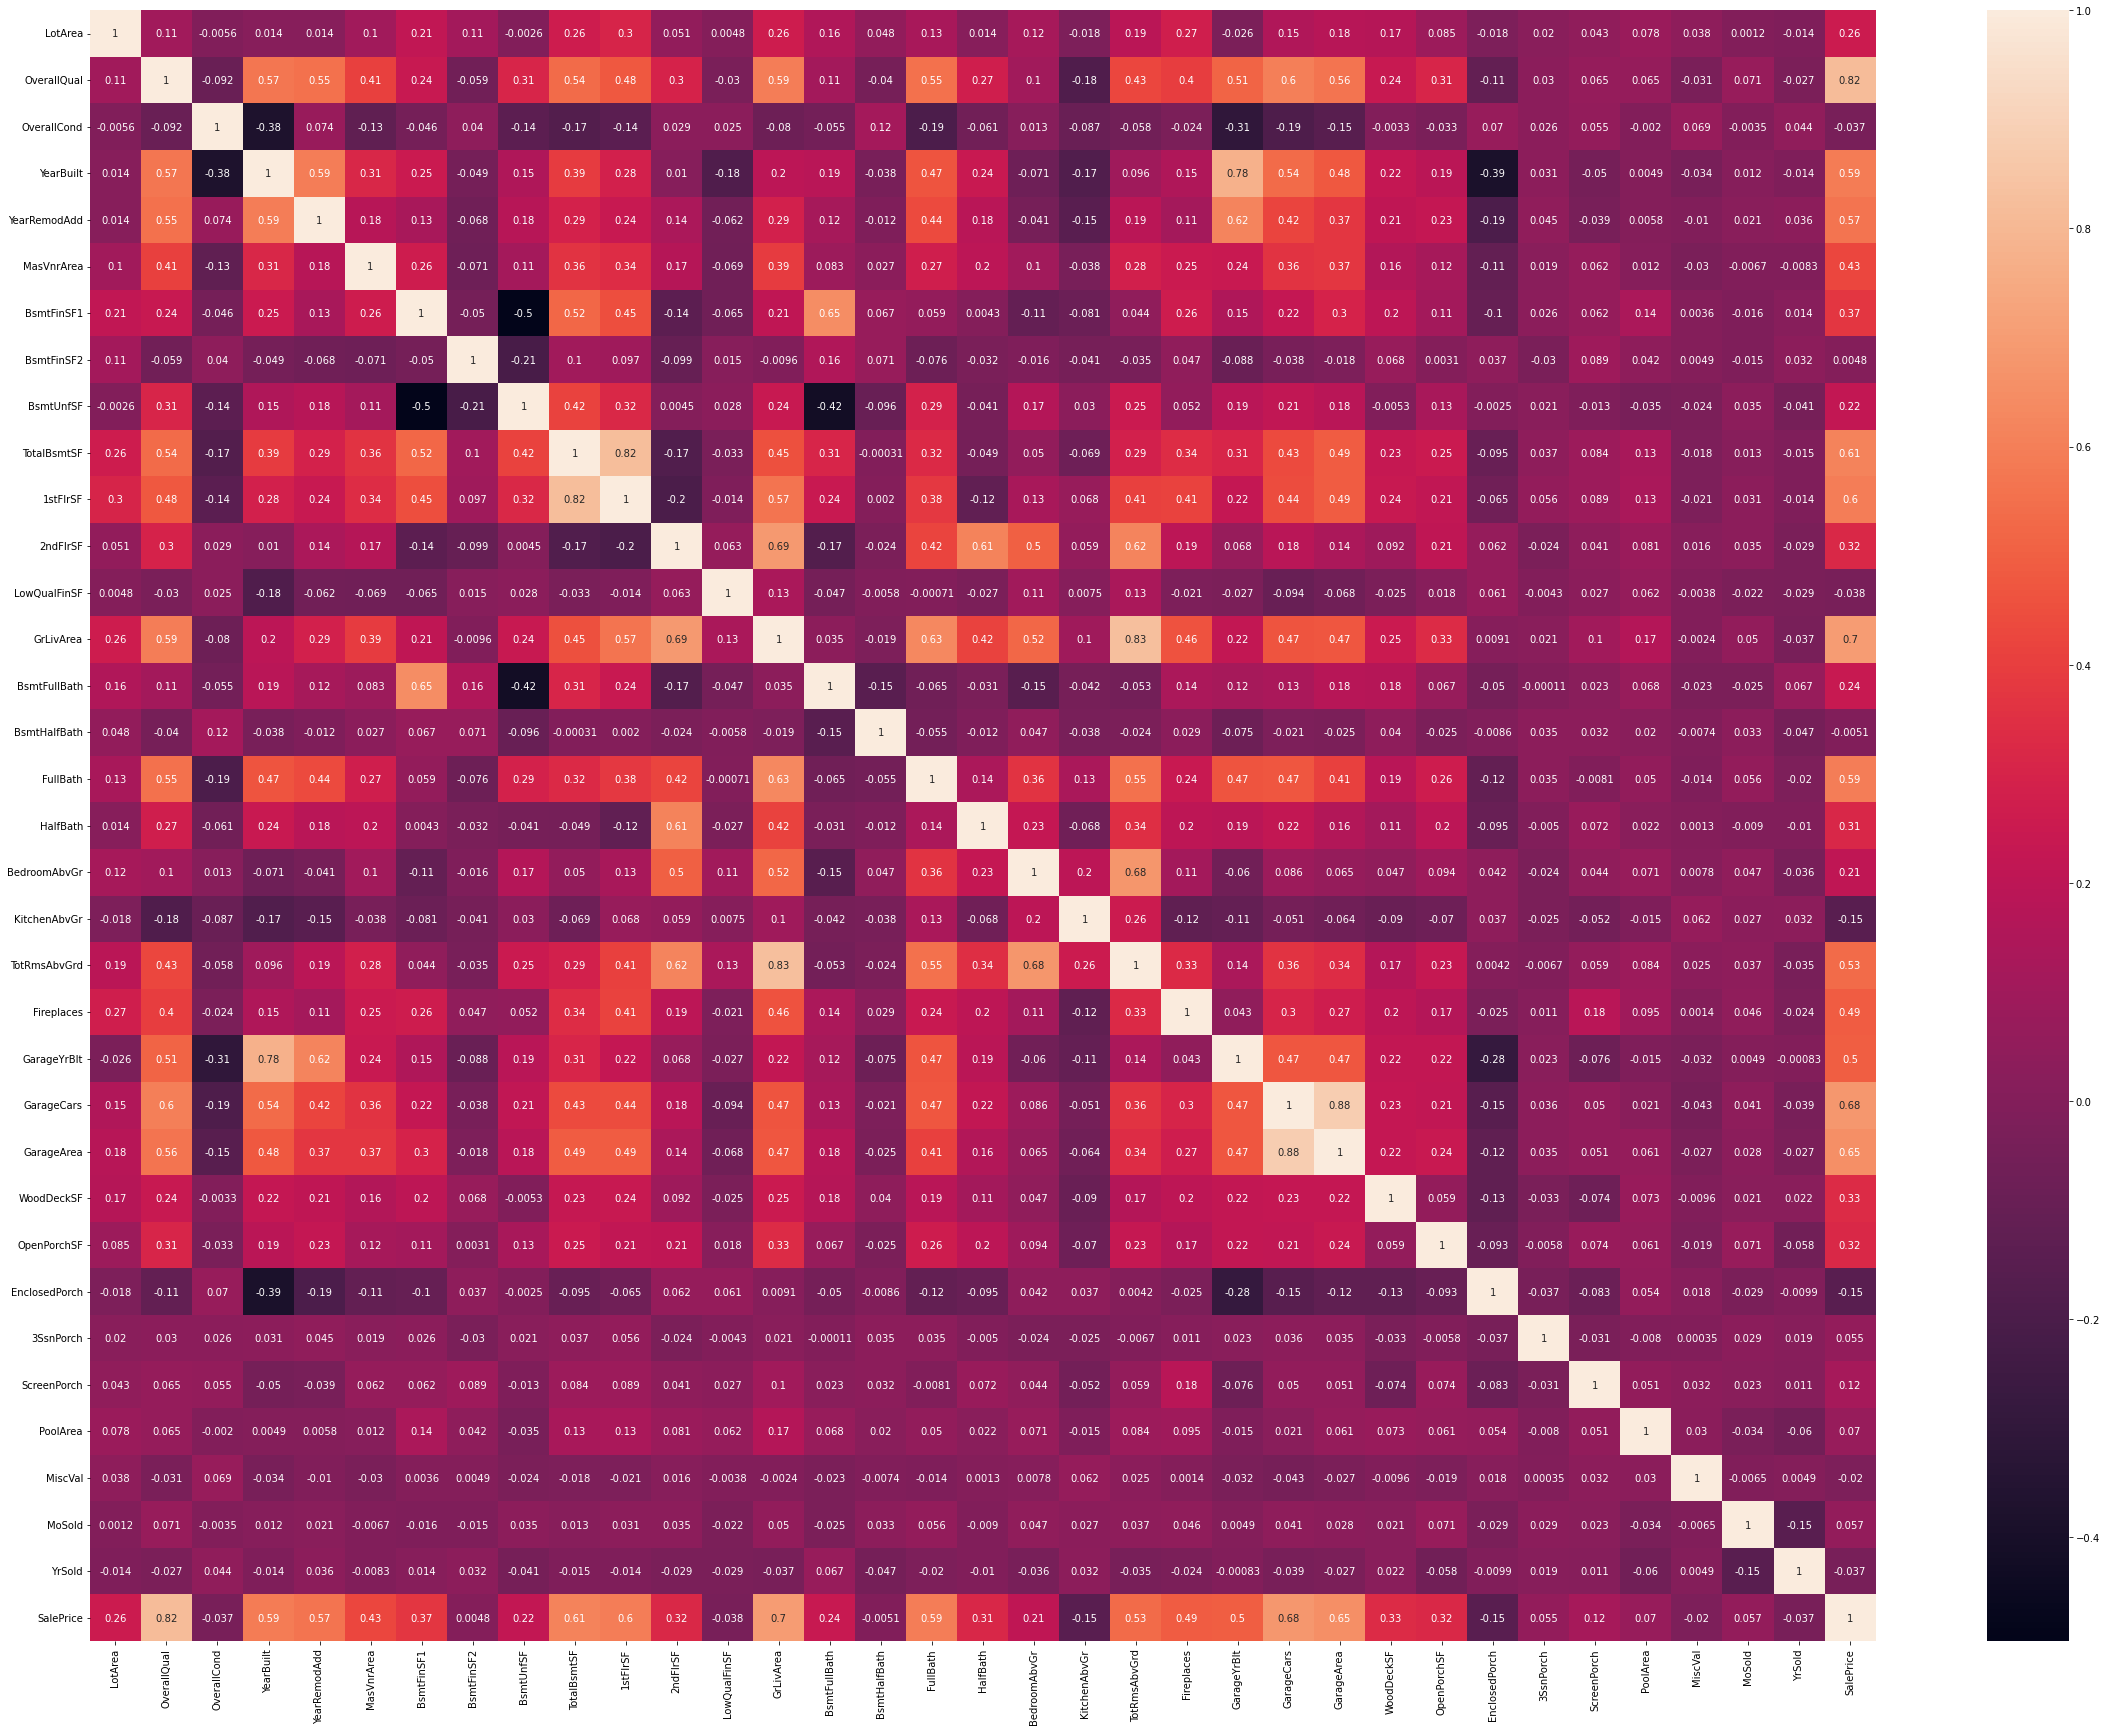

In [179]:
#making a heatmap
plt.figure(figsize=(40,30))
house_corr = house.corr()
sns.heatmap(house_corr,annot=True)

Performing EDA would be difficult on so many features. So we are choosing the features that have corelation > 0.5 to the price


In [180]:
corr_val = house[list(house.dtypes[house.dtypes != 'object'].index)].corr() #Corr_val will store data of object type
corr_val = corr_val[corr_val['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending=False) #Filtering columns with correlation > 0.5
print(corr_val[1:])
corr_coef_cols = [index for index in corr_val.index]

OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
Name: SalePrice, dtype: float64


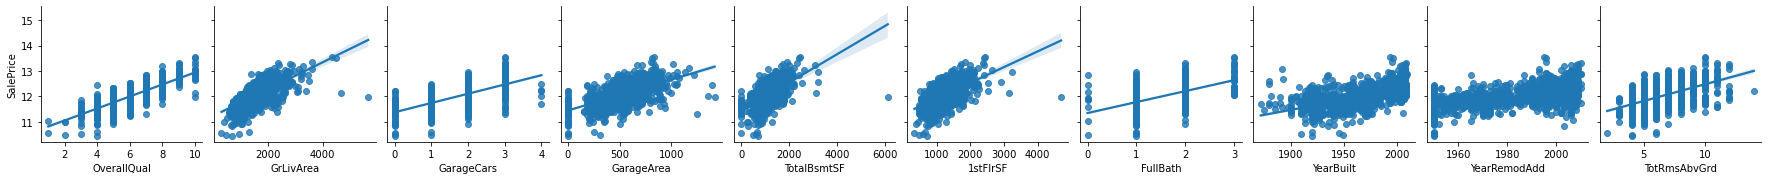

In [181]:
sns.pairplot(house, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

Observation:
<br>
<br>
1. OverallQual : It is observer that People are willing to pay houses with high quality
2. GrLivArea : Most of the houses have ground living area under 2000 sq.ft.
3. GarageCars : Most of the houses have car parking for 1-2 cars, for more number of car parking the price increases
4. GarageArea : Most of the houses have a garage area of roughly 500 sq feet
5. TotalBsmtSF : there is linear relationship with price. most of the basment are is under 2000 Sq. ft
6. 1stFlrSF : Again there is linear relationship with price and the 1st floor area for most of the houses is between 750 to 1500 sq ft
7. FullBath : Most houses have 0-1 bathroom, the prices increases as the number of bathroom increases
8. YearBuilt : Most of the houses have been constructed recently.
9. YearRemodAdd : for remodeled house, the price increases.
10. TotRmsAbvGrd : most of the houses have around 4-6 bedrooms, the price increaces with certen exceptions
    

### Checking for outliers

In [182]:
house_numeric_vars_1 = house[["LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]]
house_numeric_vars_2 = house[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]]
house_numeric_vars_3 = house[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]]
print(house_numeric_vars_1.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
print(house_numeric_vars_2.describe(percentiles=[.25,.5,.75,.90,.95,.99]))
print(house_numeric_vars_3.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

             LotArea    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count    1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808   1984.865753   103.117123   443.639726   
std      9981.264932    30.202904     20.645407   180.731373   456.098091   
min      1300.000000  1872.000000   1950.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   1967.000000     0.000000     0.000000   
50%      9478.500000  1973.000000   1994.000000     0.000000   383.500000   
75%     11601.500000  2000.000000   2004.000000   164.250000   712.250000   
90%     14381.700000  2006.000000   2006.000000   335.000000  1065.500000   
95%     17401.150000  2007.000000   2007.000000   456.000000  1274.000000   
99%     37567.640000  2009.000000   2009.000000   791.280000  1572.410000   
max    215245.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  
co

In [183]:
house_numeric_vars_to_cap = house[['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']]


In [184]:
#We will cap the values of the columns having outliers to the 95th percentile
for column in house_numeric_vars_to_cap.columns:
    percentile_95 = house[column].quantile([0.05,0.95]).values
    
    house[column][house[column] <= percentile_95[0]] = percentile_95[0]
    house[column][house[column] >= percentile_95[1]] = percentile_95[1]

##### Creating Dummy variables

In [185]:
house['CentralAir'] = house['CentralAir'].map({'Y': 1, 'N': 0})
house['CentralAir'] = house['CentralAir'].astype(int)

In [186]:
house_categorical_vars = house.select_dtypes(include=['object']) #Columns with datatype object

In [187]:
for column in house_categorical_vars:
    # Creating a dummy variable for the variables and dropping the first one.
    dummy_df = pd.get_dummies(house[column], prefix = column, drop_first=True)
    #Adding the results to the master dataframe
    house = pd.concat([house,dummy_df],axis = 1)

In [188]:
house.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [189]:
#dropping the original categorical columns
for column in house_categorical_vars:
    house = house.drop(column,1)
    
house.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450.0,7,5,2003,2003,196.0,706,0.0,150,856.0,...,0,0,0,0,1,0,0,0,1,0
1,9600.0,6,8,1976,1976,0.0,978,0.0,284,1262.0,...,0,0,0,0,1,0,0,0,1,0
2,11250.0,7,5,2001,2002,162.0,486,0.0,434,920.0,...,0,0,0,0,1,0,0,0,1,0
3,9550.0,7,5,1915,1970,0.0,216,0.0,540,756.0,...,0,0,0,0,1,0,0,0,0,0
4,14260.0,8,5,2000,2000,350.0,655,0.0,490,1145.0,...,0,0,0,0,1,0,0,0,1,0


### Feature Standardisation

In [190]:
standard_scaler = StandardScaler() # using standard Scaler library for standardisation of features


In [191]:
house[["LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]] = standard_scaler.fit_transform(house[["LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF"]])
house[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]] = standard_scaler.fit_transform(house[["LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt","GarageCars","GarageArea"]])
house[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]] = standard_scaler.fit_transform(house[["WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","MoSold","YrSold","SalePrice"]])


In [192]:
house.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.355260,7,5,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,...,0,0,0,0,1,0,0,0,1,0
1,-0.023731,6,8,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,...,0,0,0,0,1,0,0,0,1,0
2,0.451940,7,5,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,...,0,0,0,0,1,0,0,0,1,0
3,-0.038146,7,5,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,...,0,0,0,0,1,0,0,0,0,0
4,1.319681,8,5,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,...,0,0,0,0,1,0,0,0,1,0


### Model Building

In [224]:
#Independent variables
x = house.drop(['SalePrice'],axis=1)

#Target variable
y = house['SalePrice']

y.head()

0    0.636934
1    0.243643
2    0.833949
3   -0.492590
4    1.151709
Name: SalePrice, dtype: float64

In [225]:
x.head()

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.355260,7,5,1.050994,0.878668,0.739648,0.667140,-0.327561,-0.980932,-0.576587,...,0,0,0,0,1,0,0,0,1,0
1,-0.023731,6,8,0.156734,-0.429577,-0.654947,1.327216,-0.327561,-0.657604,0.594174,...,0,0,0,0,1,0,0,0,1,0
2,0.451940,7,5,0.984752,0.830215,0.497729,0.133255,-0.327561,-0.295670,-0.392034,...,0,0,0,0,1,0,0,0,1,0
3,-0.038146,7,5,-1.863632,-0.720298,-0.654947,-0.521967,-0.327561,-0.039904,-0.864952,...,0,0,0,0,1,0,0,0,0,0
4,1.319681,8,5,0.951632,0.733308,1.835402,0.543376,-0.327561,-0.160548,0.256787,...,0,0,0,0,1,0,0,0,1,0


In [226]:
#Splitting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [227]:
#parameter for hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

### Ridge Regression


In [228]:
ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [229]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [230]:
#Fitting Ridge model for alpha = 7 
alpha = 7
ridge = Ridge(alpha=alpha)

ridge_model = ridge.fit(x_train, y_train)


In [231]:
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)

metric_ridge = []

# Train R2 score
train_r2_ridge= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_ridge))
metric_ridge.append(train_r2_ridge)

# Test R2 score
test_r2_ridge = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_ridge))
metric_ridge.append(test_r2_ridge)

# Train RSS
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge.append(train_rss_ridge)

#Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge.append(test_rss_ridge)

#Train MSE
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))

#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))


Train r2 = 0.9470779887586991
Test r2 = 0.8996669859488885
Train RSS = 54.237988463373874
Test RSS = 43.465727797384325
Train MSE = 0.05312241769184513
Test MSE = 0.09923682145521535


In [232]:
cv_results = pd.DataFrame(model_cv.cv_results_)

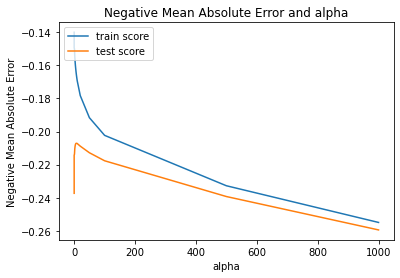

In [233]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Lasso Regression

In [234]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [235]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [236]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso_model = lasso.fit(x_train, y_train)
print(lasso.coef_)

[ 7.15527428e-02  1.03465179e-01  1.06310250e-01  1.78996827e-01
  6.84039636e-02  9.43613043e-03  0.00000000e+00 -1.99693427e-02
 -6.38680259e-02  1.91843021e-01  3.22959659e-02 -0.00000000e+00
  5.91494640e-02  0.00000000e+00  3.04014236e-01  3.62301676e-02
 -3.03637818e-03  1.40860358e-02  3.47538819e-02 -6.91415321e-04
  0.00000000e+00 -8.16766755e-03  2.02212340e-02  1.01633682e-02
  8.55205776e-03  7.97492704e-02  2.74769911e-02  1.22925646e-02
  4.72969175e-03  0.00000000e+00  1.18578827e-02  0.00000000e+00
  0.00000000e+00  7.97758567e-04 -3.99048108e-03 -3.77864154e-02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.34254635e-02
  1.15095880e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.82467542e-01  0.00000000e+00 -1.66979487e-01 -0.00000000e+00
 -8.74072720e-02  0.00000000e+00  0.00000000e+00  5.05957382e-03
 -1.22530634e-01 -0.00000000e+00 -0.00000000e+00  1.32916762e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  1.40534999e-02  0.00000

In [237]:
y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

metric_lasso = []

# Train R2 score
train_r2_lasso= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_lasso))
metric_lasso.append(train_r2_lasso)

# Test R2 score
test_r2_lasso = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_lasso))
metric_lasso.append(test_r2_lasso)

# Train RSS
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso.append(train_rss_lasso)

#Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso.append(test_rss_lasso)

#Train MSE
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))

#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))

Train r2 = 0.9462611705219924
Test r2 = 0.8834185384405329
Train RSS = 55.07511798774462
Test RSS = 50.50479268751603
Train MSE = 0.05394232907712499
Test MSE = 0.11530774586190874


In [238]:
cv_results = pd.DataFrame(model_cv.cv_results_)

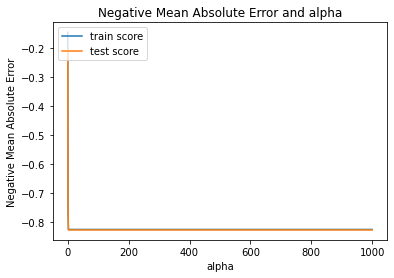

In [239]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### The Optimal value of alpha is:

Ridge : 7.0 <br>
Lasso : 0.001

In [209]:
#Doubling the alphas
ridge_alpha_double = 14
lasso_alpha_double = 0.002

#Ridge regression model
ridge_double = Ridge(alpha=ridge_alpha_double)
ridge_double_model = ridge_double.fit(x_train, y_train)

#Lasso regression model
lasso_double = Lasso(alpha=lasso_alpha_double)   
lasso_double_model = lasso_double.fit(x_train, y_train)

In [210]:
y_train_pred = ridge_double.predict(x_train)
y_test_pred = ridge_double.predict(x_test)

metric_ridge_double = []

# Train R2 score
train_r2_ridge= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_ridge))
metric_ridge_double.append(train_r2_ridge)

# Test R2 score
test_r2_ridge = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_ridge))
metric_ridge_double.append(test_r2_ridge)

# Train RSS
train_rss_ridge = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_ridge))
metric_ridge_double.append(train_rss_ridge)

#Test RSS
test_rss_ridge = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_ridge))
metric_ridge_double.append(test_rss_ridge)

#Train MSE
train_mse_ridge = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_ridge))

#Test MSE
test_mse_ridge = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_ridge))


Train r2 = 0.9424747264557893
Test r2 = 0.9021234791610868
Train RSS = 58.95571709505254
Test RSS = 42.401539042493084
Train MSE = 0.057743111748337454
Test MSE = 0.09680716676368284


In [211]:
y_train_pred = lasso_double.predict(x_train)
y_test_pred = lasso_double.predict(x_test)

metric_lasso_double = []

# Train R2 score
train_r2_lasso= r2_score(y_true=y_train,y_pred=y_train_pred)
print("Train r2 = "+ str(train_r2_lasso))
metric_lasso_double.append(train_r2_lasso)

# Test R2 score
test_r2_lasso = r2_score(y_true=y_test,y_pred=y_test_pred)
print("Test r2 = "+ str(test_r2_lasso))
metric_lasso_double.append(test_r2_lasso)

# Train RSS
train_rss_lasso = np.sum(np.square(y_train - y_train_pred))
print("Train RSS = " + str(train_rss_lasso))
metric_lasso_double.append(train_rss_lasso)

#Test RSS
test_rss_lasso = np.sum(np.square(y_test - y_test_pred))
print("Test RSS = " + str(test_rss_lasso))
metric_lasso_double.append(test_rss_lasso)

#Train MSE
train_mse_lasso = mean_squared_error(y_train, y_train_pred)
print("Train MSE = " + str(train_mse_lasso))

#Test MSE
test_mse_lasso = mean_squared_error(y_test, y_test_pred)
print("Test MSE = "+str(test_mse_lasso))


Train r2 = 0.9338171070032052
Test r2 = 0.8992584356533938
Train RSS = 67.82861993785079
Test RSS = 43.64271775531047
Train MSE = 0.06643351609975591
Test MSE = 0.0996409081171472


In [212]:
# Creating a table which contain all the metrics


rg_metric = pd.Series(metric_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')
rg_metric_double = pd.Series(metric_ridge_double, name = 'Ridge Regression Double' )
ls_metric_double = pd.Series(metric_lasso_double, name = 'Lasso Regression Double')

final_metric = pd.concat([ rg_metric, ls_metric, rg_metric_double, ls_metric_double], axis = 1)

final_metric

,Ridge Regression,Lasso Regression,Ridge Regression Double,Lasso Regression Double
0,0.947078,0.946261,0.942475,0.933817
1,0.899667,0.883419,0.902123,0.899258
2,54.237988,55.075118,58.955717,67.828620
3,43.465728,50.504793,42.401539,43.642718


In [213]:
print(max(ridge_double_model.coef_))
print(max(lasso_double_model.coef_))

0.2729369582474351
0.3179422156161506


In [214]:
#
ridge_max_col = ""
ridge_max_coef = 0
ridge_double_max_col = ""
ridge_double_max_coef = 0

lasso_max_col = ""
lasso_max_coef = 0
lasso_double_max_col = ""
lasso_double_max_coef = 0

#Calculating max coeff and most imp column of ridge model
for (coef,column) in zip(ridge_model.coef_, x_train.columns):
    if coef > ridge_max_coef:
        ridge_max_coef = coef
        ridge_max_col = column

#Calculating max coeff and most imp column of ridge_double model
for (coef,column) in zip(ridge_double_model.coef_, x_train.columns):
    if coef > ridge_double_max_coef:
        ridge_double_max_coef = coef
        ridge_double_max_col = column

#Calculating max coeff and most imp column of lasso model
for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column

#Calculating max coeff and most imp column of lasso_double model
for (coef,column) in zip(lasso_double_model.coef_, x_train.columns):
    if coef > lasso_double_max_coef:
        lasso_double_max_coef = coef
        lasso_double_max_col = column
        
print("Ridge max col = ",ridge_max_col)
print("Ridge max coef = ",ridge_max_coef)
print()
print("Ridge_double max col = ",ridge_double_max_col)
print("Ridge_double max coef = ",ridge_double_max_coef)
print()
print("Lasso max col = ",lasso_max_col)
print("Lasso max coef = ",lasso_max_coef)
print()
print("Lasso_double max col = ",lasso_double_max_col)
print("Lasso_double max coef = ",lasso_double_max_coef)

Ridge max col =  GrLivArea
Ridge max coef =  0.30015931617448616

Ridge_double max col =  GrLivArea
Ridge_double max coef =  0.2729369582474351

Lasso max col =  GrLivArea
Lasso max coef =  0.3040142357443962

Lasso_double max col =  GrLivArea
Lasso_double max coef =  0.3179422156161506


In [215]:
#determining top 5 predictors
lasso_max_coef_list = []

for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > lasso_max_coef:
        lasso_max_coef = coef
        lasso_max_col = column
    lasso_max_coef_list.append(coef)
lasso_max_coef_list.sort()

In [219]:
for (coef,column) in zip(lasso_model.coef_, x_train.columns):
    if coef > 0:
        print("{} {}".format(column,coef))

LotArea 0.07155274280753104
OverallQual 0.10346517905394134
OverallCond 0.10631025000629336
YearBuilt 0.17899682742551992
YearRemodAdd 0.06840396356098102
MasVnrArea 0.009436130434470629
TotalBsmtSF 0.1918430209005055
CentralAir 0.032295965892729955
2ndFlrSF 0.059149464041062465
GrLivArea 0.3040142357443962
BsmtFullBath 0.03623016763776774
FullBath 0.014086035780819196
HalfBath 0.03475388186987896
Fireplaces 0.02022123397262544
GarageYrBlt 0.0101633682060206
GarageCars 0.008552057756547021
GarageArea 0.07974927036170674
WoodDeckSF 0.0274769911222282
OpenPorchSF 0.012292564597687192
EnclosedPorch 0.004729691751967979
ScreenPorch 0.01185788268282398
MoSold 0.0007977585666405073
MSSubClass_70 0.11509587969006352
MSZoning_RL 0.005059573824087182
Alley_Pave 0.013291676246430021
LandContour_Low 0.014053499883697416
LotConfig_CulDSac 0.050220059974327276
LandSlope_Mod 0.01753005678958549
LandSlope_Sev 0.029453504999573814
Neighborhood_BrkSide 0.09525217475228576
Neighborhood_ClearCr 0.1592885

###### Top 5 features:
<br>TotalBsmtSF 0.1918430209005055
<br>GrLivArea 0.3040142357443962
<br>Neighborhood_Crawfor 0.29011694290972645
<br>Neighborhood_Somerst 0.2256070198615187
<br>Exterior1st_BrkFace 0.2102328555223782

In [220]:
#Dropping the above 5 variables from x_train
x_train_excluding_top_5 = x_train.drop(['TotalBsmtSF', 'GrLivArea', 'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'Exterior1st_BrkFace'],axis=1)

#Lasso regression model
lasso_excluding_top_5 = Lasso(alpha=0.01)   
lasso_excluding_top_5_model = lasso_excluding_top_5.fit(x_train_excluding_top_5, y_train)

In [221]:
#determining top 5 predictors
lasso_max_coef_excluding_top_5_list = []

for (coef,column) in zip(lasso_excluding_top_5_model.coef_, x_train_excluding_top_5.columns):
    lasso_max_coef_excluding_top_5_list.append(coef)
lasso_max_coef_excluding_top_5_list.sort()


In [222]:
for (coef,column) in zip(lasso_excluding_top_5_model.coef_, x_train.columns):
    if coef > 0.11:
        print("{} {}".format(column,coef))

OverallQual 0.18028160058430578
YearBuilt 0.1542593532101461
BsmtFinSF1 0.12430252079465438
CentralAir 0.23938927289785245
1stFlrSF 0.2299225298919935


###### Top 5 features after dropping above 5 features:
<br>OverallQual 0.18028160058430578
<br>YearBuilt 0.1542593532101461
<br>BsmtFinSF1 0.12430252079465438
<br>CentralAir 0.23938927289785245
<br>1stFlrSF 0.2299225298919935